In [26]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import scipy as sp
import glob
import os
from omegaconf import OmegaConf

import matplotlib.pyplot as plt
from matplotlib import cm
plt.style.use('bmh')
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.dpi'] = 400
plt.rcParams['font.size'] = 8
plt.rcParams['legend.fontsize'] = 7
plt.rcParams['legend.loc'] = 'lower right'

In [3]:
def load_run(run_dir, ty):
    df = pd.read_csv(os.path.join(run_dir, f'{ty}.csv'))
    run_id = run_dir.split('/')[-1]
    df['run_id'] = f'run={run_id}'
    overrides = OmegaConf.load(os.path.join(run_dir, '.hydra', 'overrides.yaml'))
    for override in overrides:
        key = override.split('=')[0]
        value = '='.join(override.split('=')[1:])
        df[key] = value
    return df

def load_experiment(exp_dirs, ty='eval'):
    run_dirs = []
    for exp_dir in exp_dirs:
        run_dirs += glob.glob(os.path.join(exp_dir, '*'))
    
    dfs = []
    for run_dir in run_dirs:
        try:
            df = load_run(run_dir, ty)
            dfs.append(df)
        except:
            pass
        
    return pd.concat(dfs, sort=False)

In [4]:
def plot(df,  key='episode_reward'):
    envs = ['cube']
    ncol = 1
    nrow = 1
    fig, axs = plt.subplots(nrow, ncol, figsize=(4 * ncol, 3 * nrow))

    #runs = sorted([str(x) for x in df.run.unique()])

    for idx, env in enumerate(envs):
        data = df##df[df['env'] == env]
        row = idx // ncol
        col = idx % ncol
        ax = axs
        hue_order = np.sort(data.Agent.unique())
        #import ipdb; ipdb.set_trace()
        sns.lineplot(x='step', y=key, data=data, ci='sd', hue='Agent', hue_order=hue_order, ax=ax)
        #sns.lineplot(x='step', y=key, data=data, ci='sd', hue='run_id', ax=ax, palette=sns.color_palette('Blues')[3:4])
        
        ax.set_title(f'{env}')
        #ax.set_xlim(0, 10000000)
        #ax.set_ylim(0.0, 1050.0)
        #ax.legend_.remove()
        
    plt.tight_layout()
    plt.show()

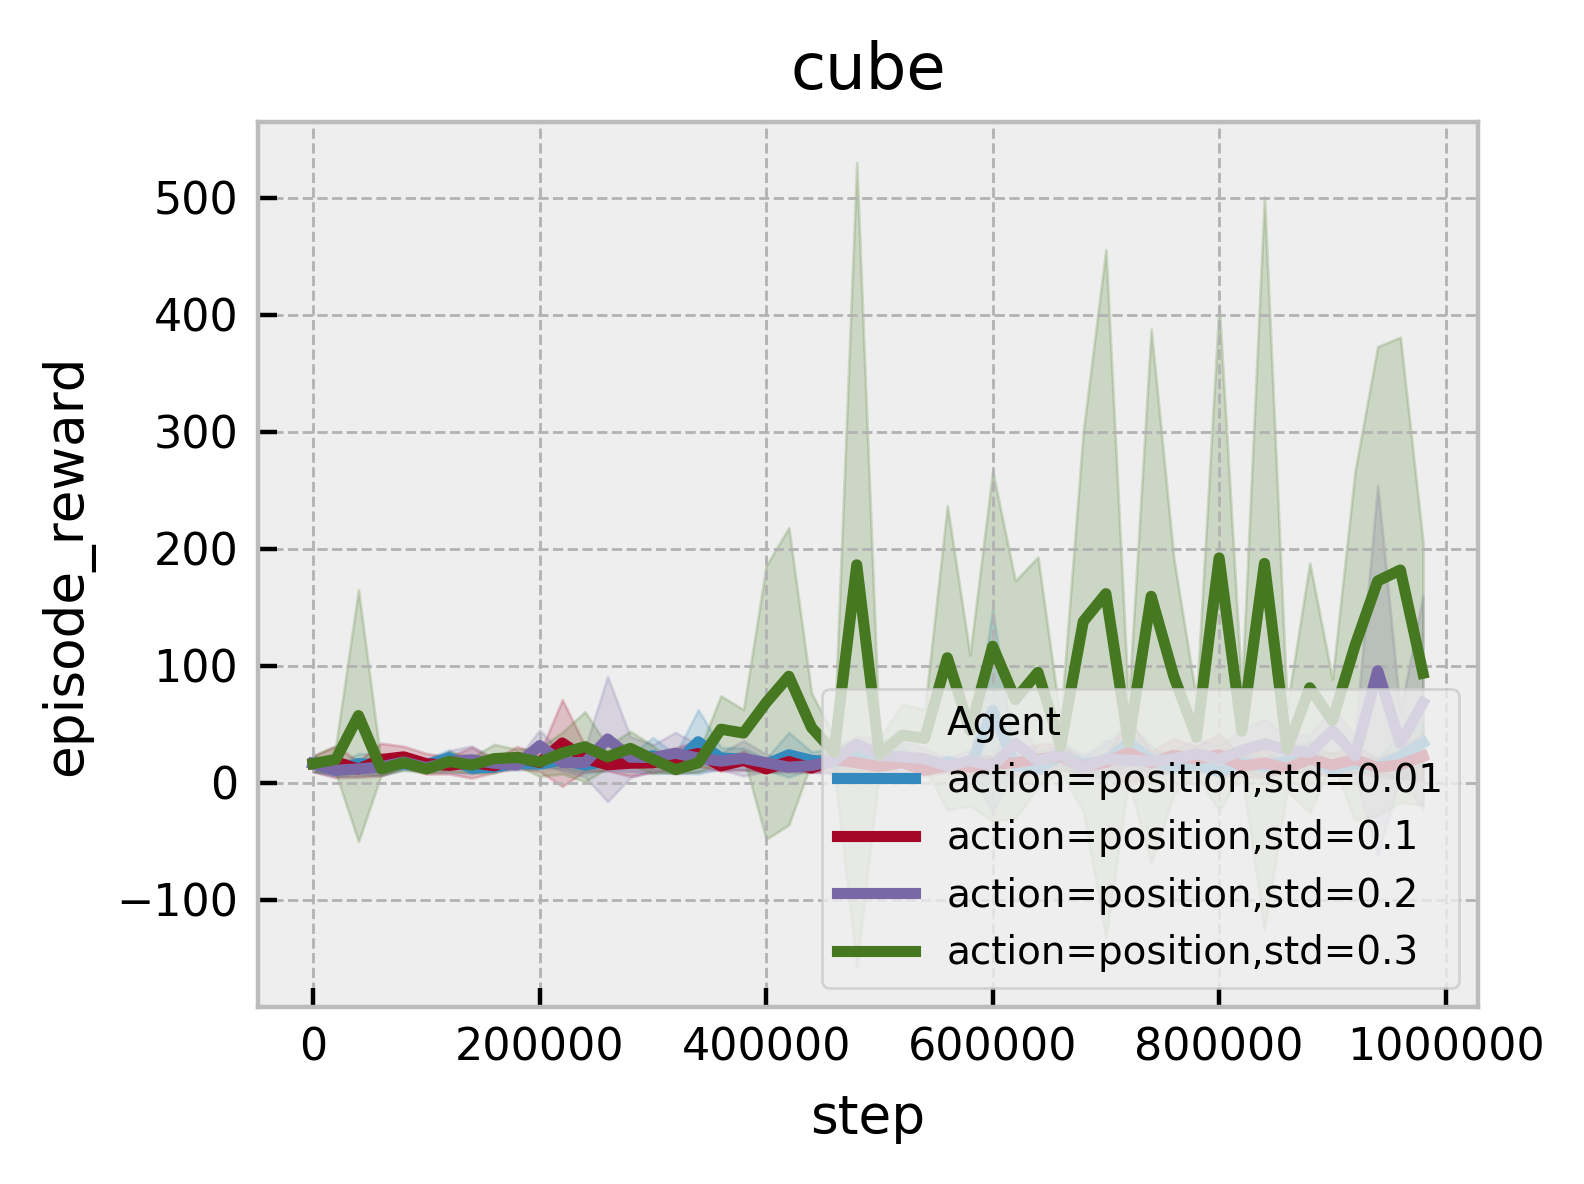

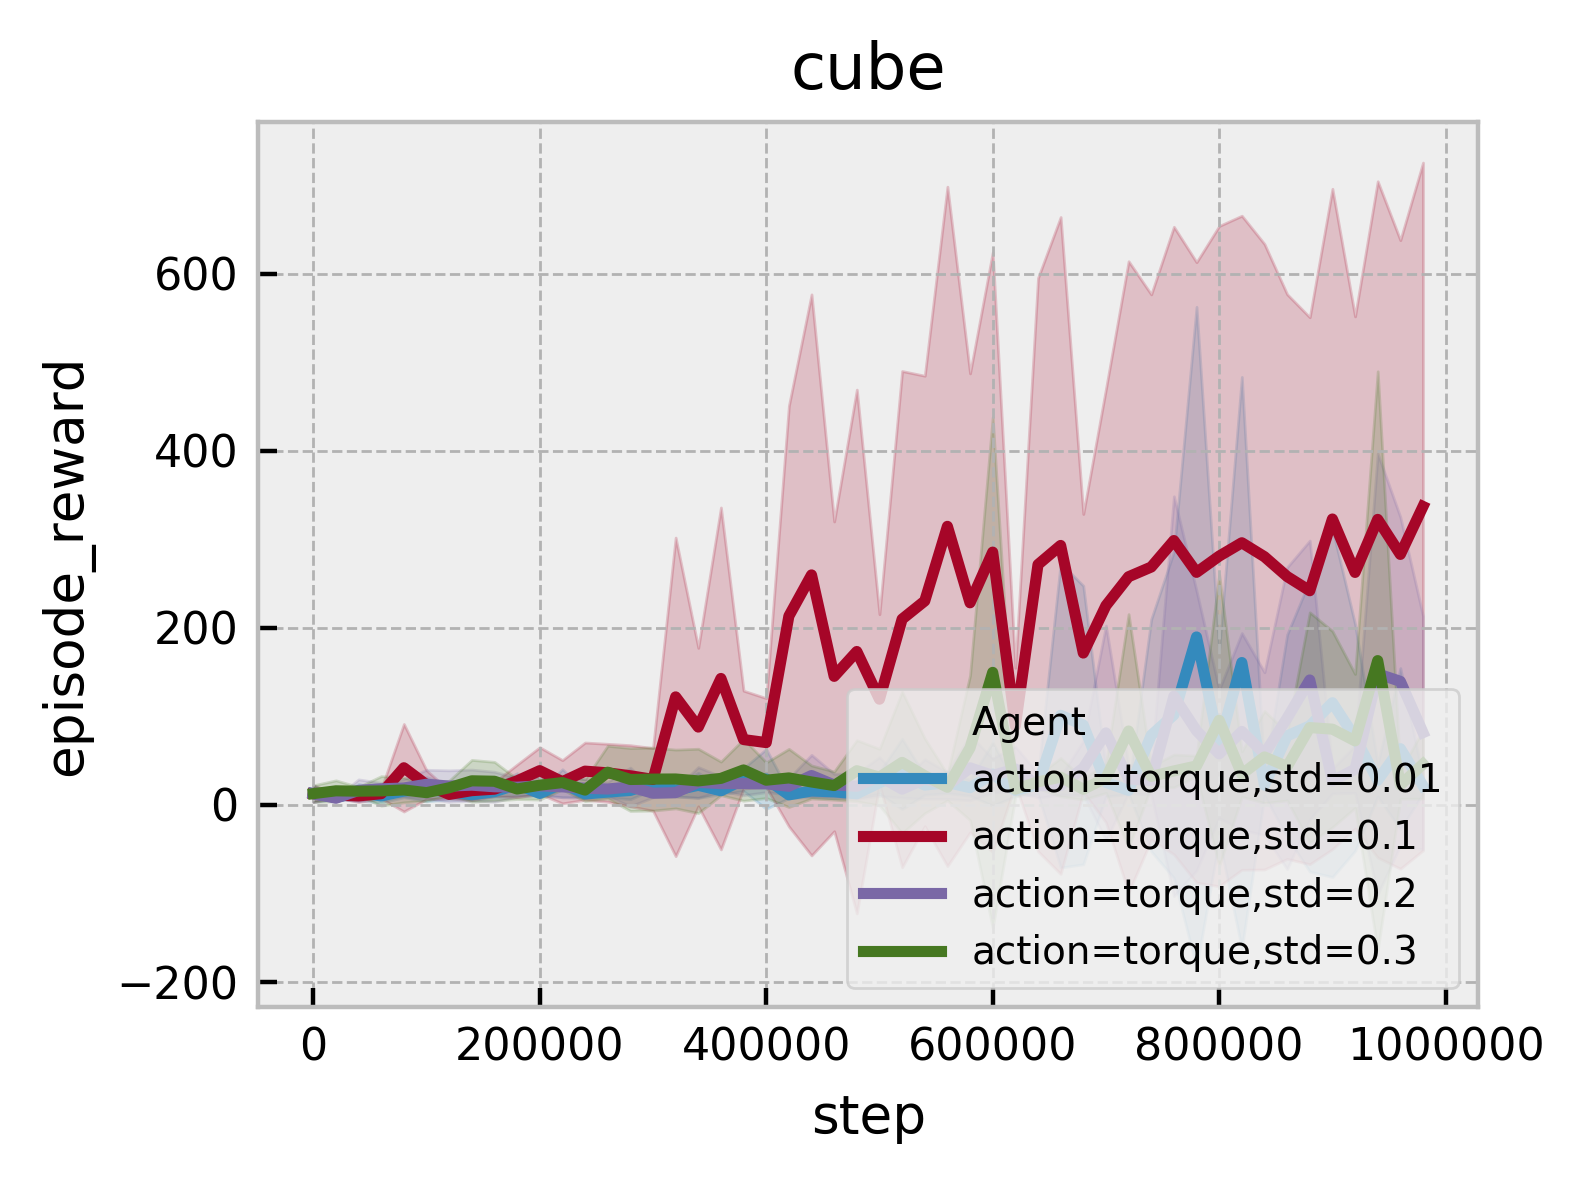

In [27]:
dfs = []

exp_dirs = [
    '../exp/2020.08.13/150710_ddpg_cube',
]

for aty in ['position', 'torque']:
    dfs = []
    for std in [0.01, 0.1, 0.2, 0.3]:
        df = load_experiment(exp_dirs, ty='eval')
        df = df[(df['action_type'] == aty) & (df['actor_stddev'] == str(std))]
        df['Agent'] = f'action={aty},std={std}'
        dfs.append(df)
        
    df = pd.concat(dfs, sort=False)
    plot(df)


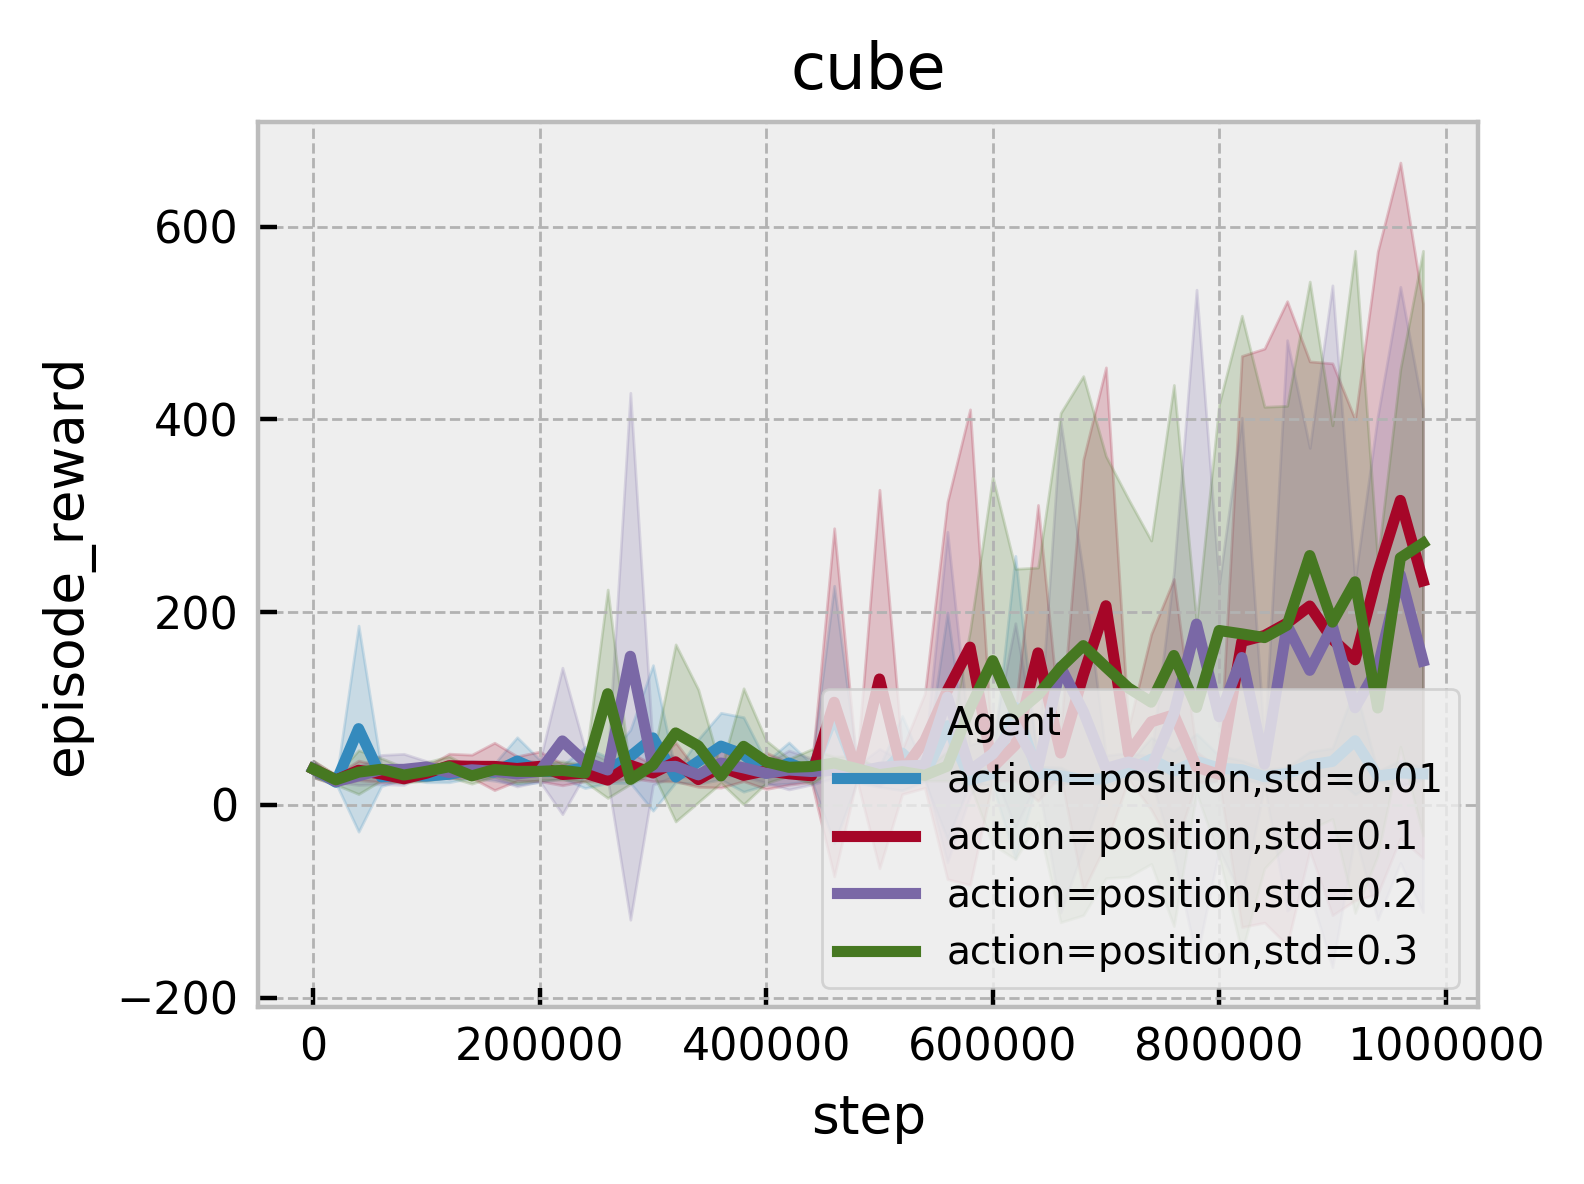

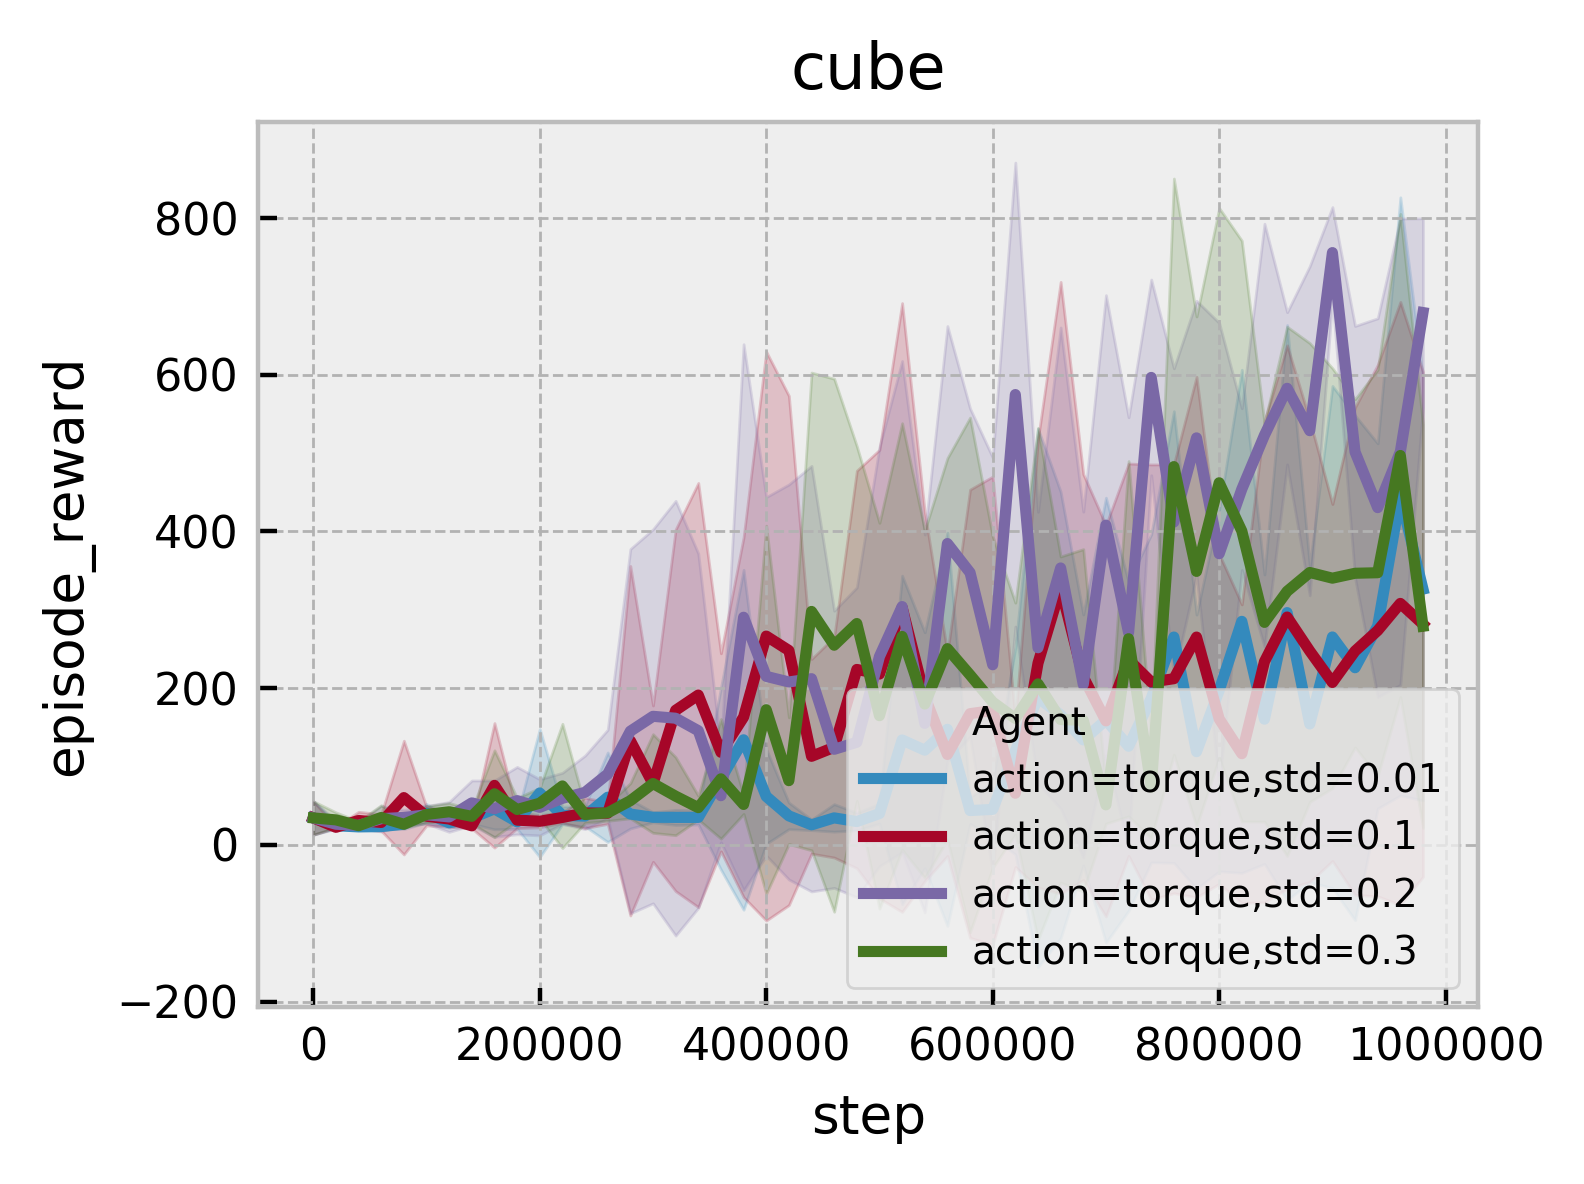

In [28]:
dfs = []

exp_dirs = [
    '../exp/2020.08.13/161429_ddpg_no_away',
]

for aty in ['position', 'torque']:
    dfs = []
    for std in [0.01, 0.1, 0.2, 0.3]:
        df = load_experiment(exp_dirs, ty='eval')
        df = df[(df['action_type'] == aty) & (df['actor_stddev'] == str(std))]
        df['Agent'] = f'action={aty},std={std}'
        dfs.append(df)
        
    df = pd.concat(dfs, sort=False)
    plot(df)


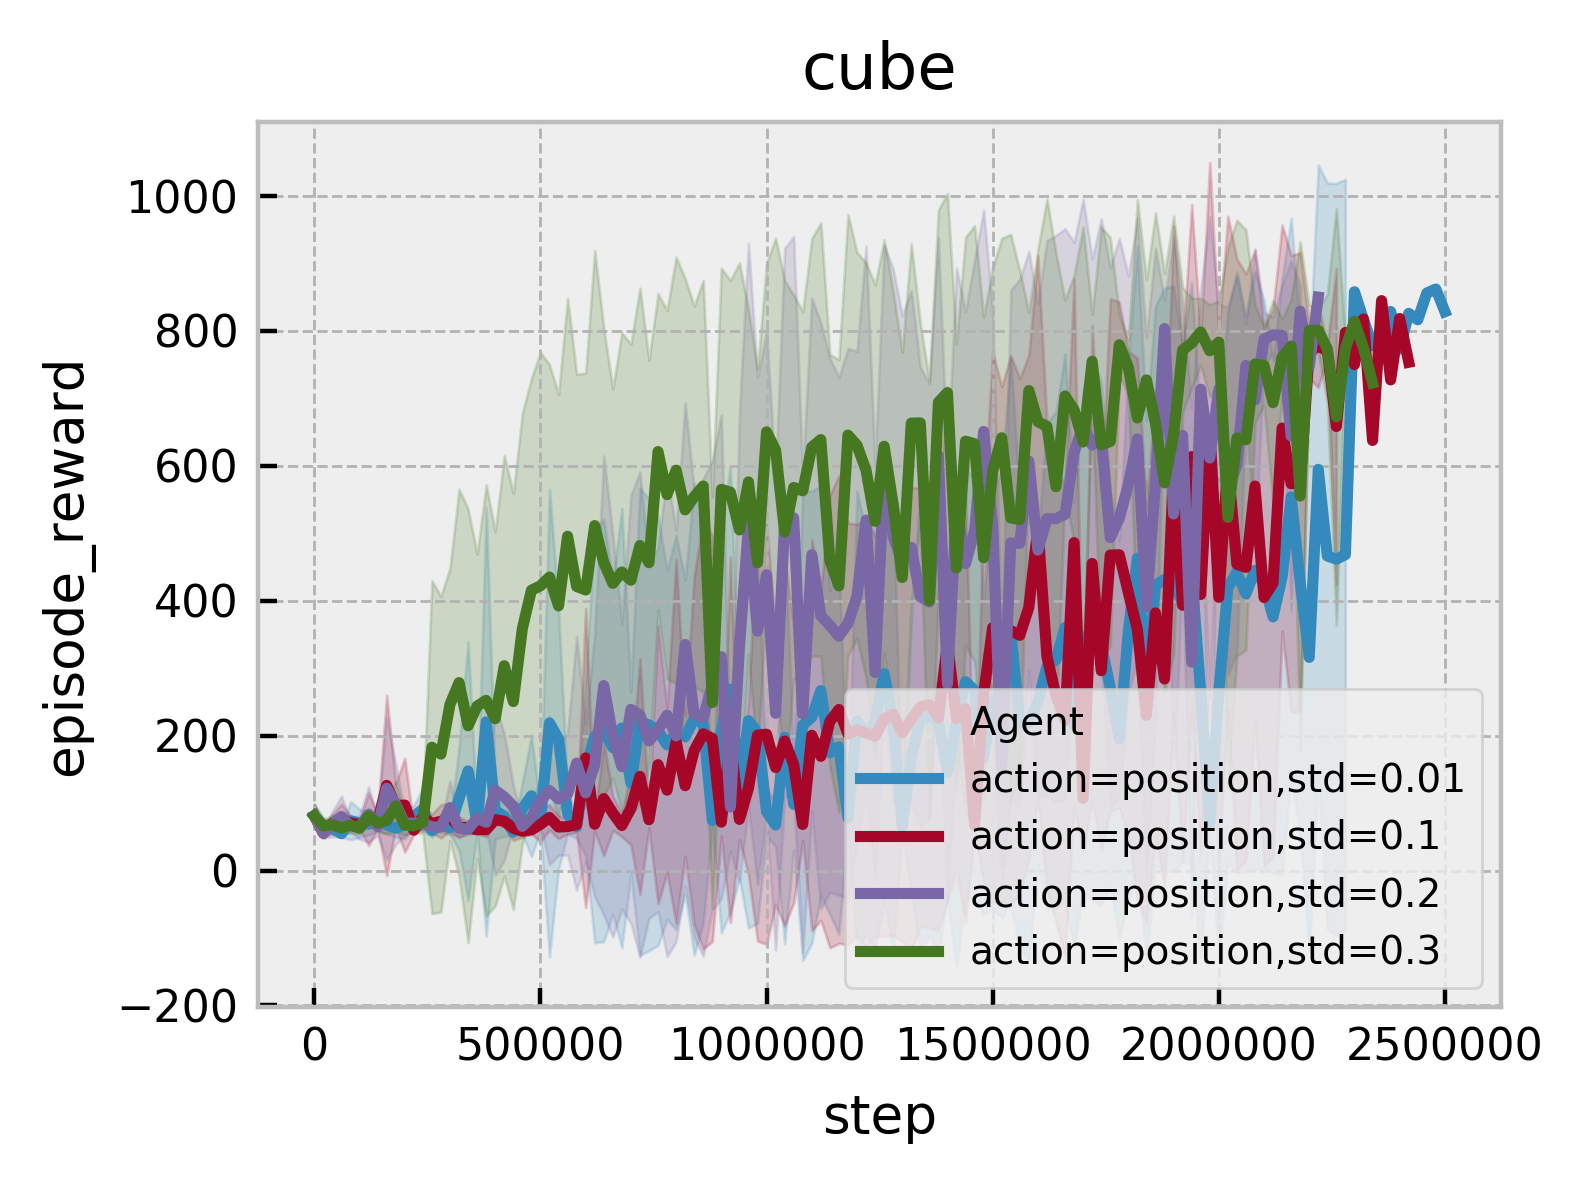

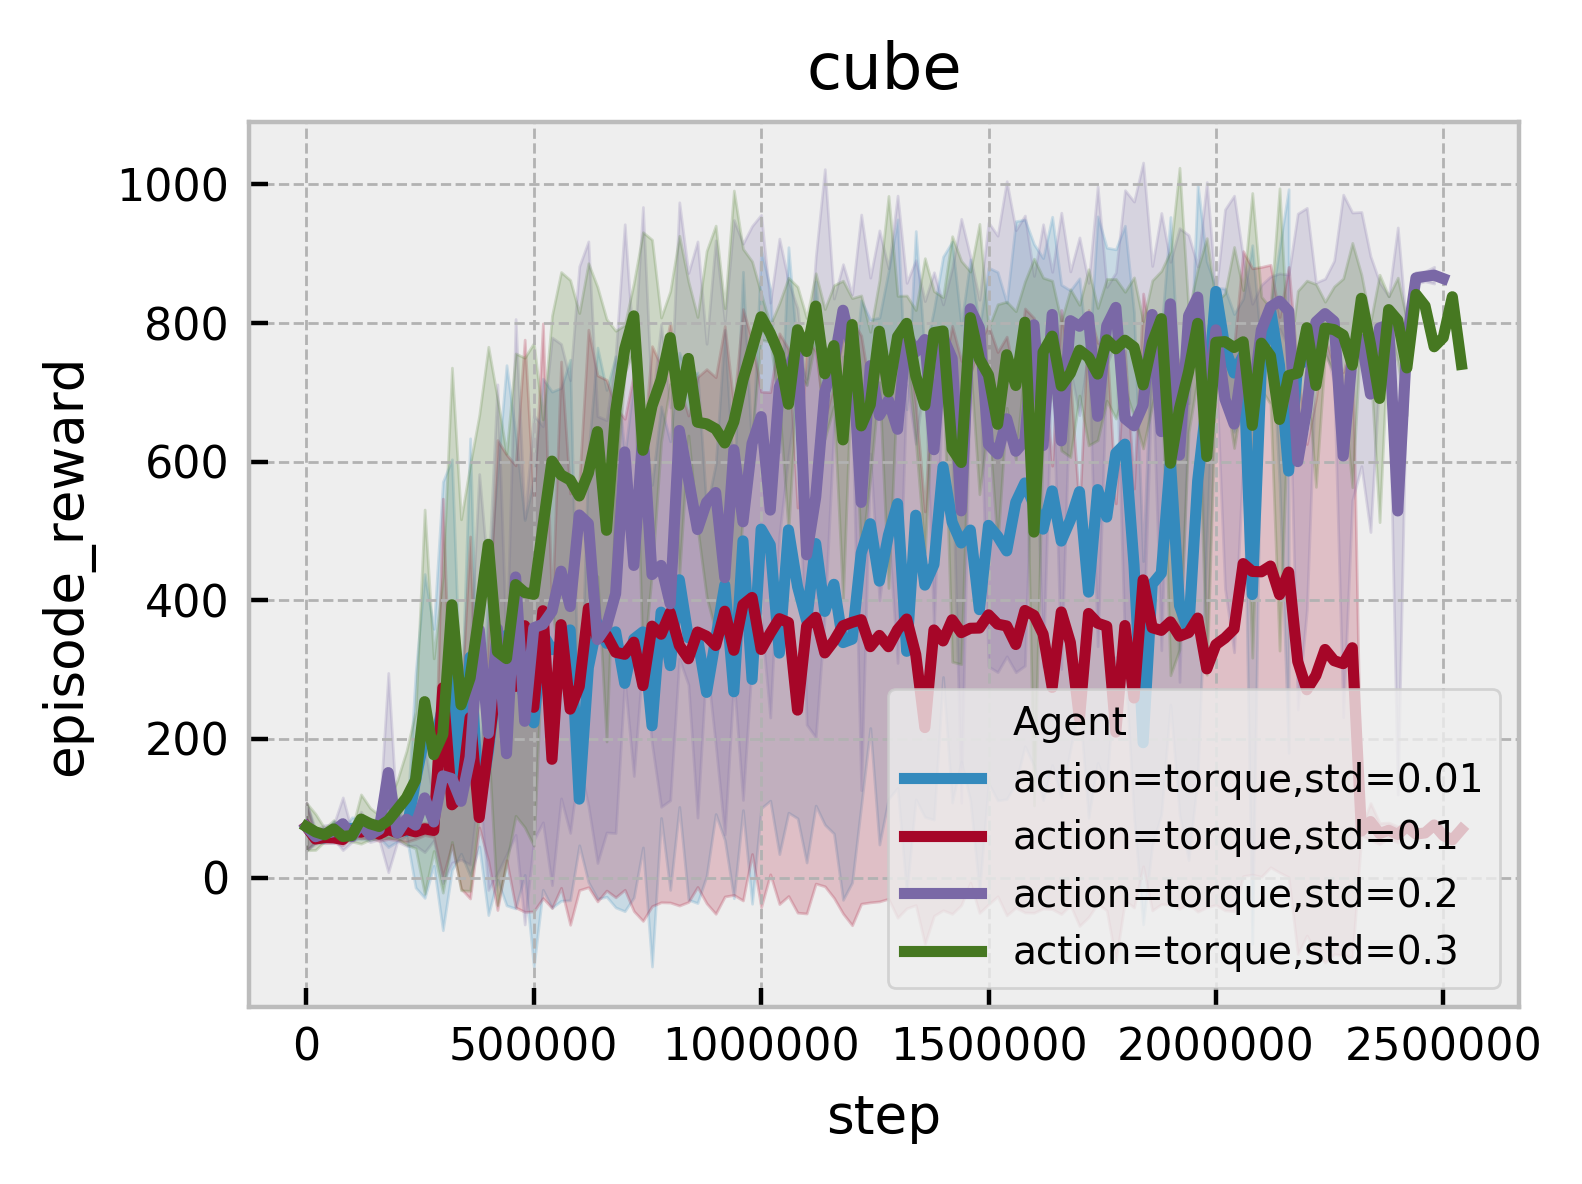

In [29]:
dfs = []

exp_dirs = [
    '../exp/2020.08.13/191743_ddpg_val_at_margin',
]

for aty in ['position', 'torque']:
    dfs = []
    for std in [0.01, 0.1, 0.2, 0.3]:
        df = load_experiment(exp_dirs, ty='eval')
        df = df[(df['action_type'] == aty) & (df['actor_stddev'] == str(std))]
        df['Agent'] = f'action={aty},std={std}'
        dfs.append(df)
        
    df = pd.concat(dfs, sort=False)
    plot(df)


In [33]:
df[(df['actor_stddev'] == str(0.3)) & (df['seed'] ==str(1))]

,episode,episode_length,episode_reward,step,run_id,experiment,log_save_tb,video_fps,env,num_train_steps,eval_frequency,num_eval_episodes,action_type,actor_stddev,seed,Agent
0,1.0,1000.0,55.050595,0,run=35,val_at_margin,false,10,cube,5000000,20000,5,torque,0.3,1,"action=torque,std=0.3"
1,21.0,1000.0,51.660522,20000,run=35,val_at_margin,false,10,cube,5000000,20000,5,torque,0.3,1,"action=torque,std=0.3"
2,41.0,1000.0,53.250851,40000,run=35,val_at_margin,false,10,cube,5000000,20000,5,torque,0.3,1,"action=torque,std=0.3"
3,61.0,1000.0,55.543776,60000,run=35,val_at_margin,false,10,cube,5000000,20000,5,torque,0.3,1,"action=torque,std=0.3"
4,81.0,1000.0,64.552444,80000,run=35,val_at_margin,false,10,cube,5000000,20000,5,torque,0.3,1,"action=torque,std=0.3"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2281.0,1000.0,854.366026,2280000,run=35,val_at_margin,false,10,cube,5000000,20000,5,torque,0.3,1,"action=torque,std=0.3"
115,2301.0,1000.0,853.147237,2300000,run=35,val_at_margin,false,10,cube,5000000,20000,5,torque,0.3,1,"action=torque,std=0.3"
116,2321.0,1000.0,832.490471,2320000,run=35,val_at_margin,false,10,cube,5000000,20000,5,torque,0.3,1,"action=torque,std=0.3"
117,2341.0,1000.0,736.866469,2340000,run=35,val_at_margin,false,10,cube,5000000,20000,5,torque,0.3,1,"action=torque,std=0.3"
